
# SENG 474
# Assignment 1 - Problem 9
# Nolan Kurylo
# V00893175
 
References:

1) https://www.kdnuggets.com/2019/03/beginners-guide-linear-regression-python-scikit-learn.html

2) https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

Over the first 10 polynomial degrees, the best transformation was found to be of degree 5, having the lowest MSE of: 0.003714184678020872


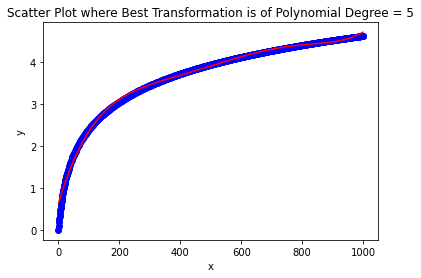

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

np.random.seed(1337)

df = pd.read_csv('prob9-data.csv',  header=None) # create dataframe of csv

def find_best_transformation(X, y):
    """ Finds the best polynomial degree, with the lowest mean squared error, to fit the points of data
    :param X: feature set
    :param y: label vector
    :return: best polynomial degree and its MSE
    """
    
    min_mse_index = 0 # keep track of the best mse
    min_degree = 0 # keep track of the polynomial degree associated with the best mse 

    for degree in range(10): # loop through the first 10 polynomial degrees (x^0, x^1, x^2,...)
        polynomial = PolynomialFeatures(degree) 
        X_poly = polynomial.fit_transform(X)
        LinearRegressor = LinearRegression() # generate linear regression model
        LinearRegressor.fit(X_poly, y) #training the algorithm
        prediction = LinearRegressor.predict(X_poly) #predict the outcome
        mse = mean_squared_error(prediction, y) # find the mse
        if(degree==0): # set min_mse in first iteration of loop
            min_mse = mse
        if(mse < min_mse): #update min_mse
            min_mse = mse
            min_degree = degree
        
    return min_degree, min_mse
    

df['X'] = np.arange(df.shape[0]) # make row number indices into their own column in the df
df['y'] = df.pop(0) # label the column 'y' with the time series values
X = df['X'].values.reshape(-1,1) # reshape for scikit-learn library
y = df['y'].values.reshape(-1,1)

degree, mse = find_best_transformation(X, y) #find the best polynomial degree with the lowest mse
print("Over the first 10 polynomial degrees, the best transformation was found to be of degree "+ str(degree) + ", having the lowest MSE of: " + str(mse))

polynomial = PolynomialFeatures(degree) #using the best degree, create polynomial regression model
X_poly = polynomial.fit_transform(X)

LinearRegressor = LinearRegression() # generate linear regression model
LinearRegressor.fit(X_poly, y) #training the algorithm


prediction = LinearRegressor.predict(X_poly)

plt.xlabel('x')
plt.ylabel('y')
plt.plot(X, prediction, color='red') # plot line
plt.scatter(X, y,  color='blue') # plot points
plt.title("Scatter Plot where Best Transformation is of Polynomial Degree = " + str(degree))
plt.show()
